# 5030 Assignment 5

## Steve Ferenzi 

### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [81]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [ ]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

print(A @ e_1)
print(A @ e_2)
print(A @ e_3)

[1 4 7]
[2 5 8]
[3 6 9]


	By definition, when you multiply a matrix A by a vector x, each component of x “weights” one column of A.

		e_1 = [1, 0, 0]: takes 1×(first column) + 0×(others) --> first column only [1,4,7]
		e_2 = [0, 1, 0]: takes 1×(second column) --> second column only [2, 5, 8]
		e_3 = [0, 0, 1]: takes 1×(third column) --> third column only [3, 6, 9]


b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [83]:
u = np.ones(3)
A @ u

array([ 6., 15., 24.])

	In matrix multiplication each element of the resulting vector is the dot product of one row of A with the vector u.

		first entry is the sum of row 1: 1 + 2 + 3 = 6

		second entry is the sum of row 2: 4 + 5 + 6 = 15

		third entry is the sum of row 3: 7 + 8 + 9 = 24

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [ ]:
A = np.array([[1,0,0],
              [0,1,0],
              [0,0,1]])

x = np.array([-2,4,11])

A @ x

array([-2,  4, 11])

    The result is exactly the same as the original vector. Multiplying any vector by the identity matrix returns the same vector, because each component of the result is formed by taking one row of the identity (isolates a single coordinate) and applying it to the vector.

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [ ]:
A = np.array([[0,0,1],
              [1,0,0],
              [0,1,0]])

x = np.array([-2,4,11])

A @ x

array([11, -2,  4])

        Result of the dot product of one row of A with x is a rearrangement of the same values:

                Row 1 = [0, 0, 1] --> picks the 3rd element of x: x_3 = 11
                Row 2 = [1, 0, 0] --> picks the 1st element of x: x_1 = -2
                Row 3 = [0, 1, 0] --> picks the 2nd element of x: x_2 = 4

        So for A not having 1's on the diagonal, it doesn’t change the values, it just rearranges them. When a matrix has exactly one 1 in each row and column but not necessarily on the diagonal, it’s called a 'permutation matrix.'

In [88]:
A = np.array([[0,1,0],
              [0,0,1],
              [1,0,0]])

x = np.array([-2,4,11])

A @ x

array([ 4, 11, -2])

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [89]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


In [94]:
print(A @ e_1)           
print(A @ e_2)           
print(A @ e_3)

[0.50052958 0.02574731 0.47372311]
[0.24049286 0.39251588 0.36699127]
[0.18358131 0.37907577 0.43734292]


    A @ e_1 --> selects first column of A
    A @ e_2 --> second column
    A @ e_3 --> third column

    Vector e_1 [1, 0, 1] --> means we are in 100% in state 1, and the first column result (A @ e_1) is the probability distribution of where the system goes after one step starting at state 1

    Similarly for the other vectors, the results are the transition distributions from state 2 and state 3.

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [95]:
def iterate(A, x, n=5):
    result = x
    for i in range(n):
        result = A @ result
    return result

r1 = iterate(A, e_1)
r2 = iterate(A, e_2)
r3 = iterate(A, e_3)

print("A^5 * e1 =", r1)
print("A^5 * e2 =", r2)
print("A^5 * e3 =", r3)

A^5 * e1 = [0.29266551 0.27862515 0.42870935]
A^5 * e2 = [0.29197422 0.27979983 0.42822595]
A^5 * e3 = [0.29171646 0.2802254  0.42805814]


    The three vectors are nearly close componentwise, with differences only on the order of 10^-3 or smaller.  Repeated multiplication washes out the initial state, and all starting states appear to be converging to the same stationary probability vector. 

    [running more iterations below to see where they converge to]

In [103]:
def iterate2(A, x, n=25):
    result = x
    for i in range(n):
        result = A @ result
    return result

r1 = iterate2(A, e_1)
r2 = iterate2(A, e_2)
r3 = iterate2(A, e_3)

print("A^5 * e1 =", r1)
print("A^5 * e2 =", r2)
print("A^5 * e3 =", r3)

A^5 * e1 = [0.29206573 0.27963902 0.42829526]
A^5 * e2 = [0.29206573 0.27963902 0.42829526]
A^5 * e3 = [0.29206573 0.27963902 0.42829526]


## *2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [105]:
import numpy as np
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])
T

array([[0.25, 0.5 ],
       [0.75, 0.5 ]])

In [106]:
init_condition = np.array([1,0])  # start in state 0

p_1 = T @ init_condition
print(p_1)

[0.25 0.75]


    Initial condition [1, 0] means 100% of the probability is in state 1. After one transition, there’s a 25% chance of being in state 1 and a 75% chance of being in state 2.

In [22]:
p_2 = T @ p_1
print(p_2)

[0.4375 0.5625]


    After 2 transitions, there’s ~43.8% probability of being in state 1 and ~56.2% in state 2.

In [119]:
T = np.array([[0.25, 0.5],
              [0.75, 0.5]])

x = np.array([1., 0.])  # start in state 0

for i in range(10):
    print(f"Step {i}: {x}")
    x = T @ x

Step 0: [1. 0.]
Step 1: [0.25 0.75]
Step 2: [0.4375 0.5625]
Step 3: [0.390625 0.609375]
Step 4: [0.40234375 0.59765625]
Step 5: [0.39941406 0.60058594]
Step 6: [0.40014648 0.59985352]
Step 7: [0.39996338 0.60003662]
Step 8: [0.40000916 0.59999084]
Step 9: [0.39999771 0.60000229]


    The chain appears to be converging toward 40% probability of being in state 1 and 60% in state 2.

In [ ]:
T = np.array([[0.25, 0.5],
              [0.75, 0.5]])

x = np.array([0., 1.])  # start in new state

for i in range(10):
    print(f"Step {i}: {x}")
    x = T @ x

Step 0: [0. 1.]
Step 1: [0.5 0.5]
Step 2: [0.375 0.625]
Step 3: [0.40625 0.59375]
Step 4: [0.3984375 0.6015625]
Step 5: [0.40039062 0.59960938]
Step 6: [0.39990234 0.60009766]
Step 7: [0.40002441 0.59997559]
Step 8: [0.3999939 0.6000061]
Step 9: [0.40000153 0.59999847]


    Beginning with new initial condition [0, 1] (100% of the probability is in state 2), long-term convergence appears to be the same steady-state distribution [0.4, 0.6] as initial condition [1, 0].

## 3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [125]:
weather = pd.read_csv('cville_weather.csv')
weather.head(10)

,STATION,NAME,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES
0,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-04,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN
1,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-07,NaN,NaN,NaN,NaN,1.08,",,N",NaN,NaN,NaN,NaN
2,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-09,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN
3,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-10,NaN,NaN,NaN,NaN,3.00,",,N",NaN,NaN,NaN,NaN
4,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-24,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
5,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-25,NaN,NaN,NaN,NaN,0.18,",,N",NaN,NaN,NaN,NaN
6,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-26,NaN,NaN,NaN,NaN,0.08,",,N",NaN,NaN,NaN,NaN
7,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-27,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
8,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-28,NaN,NaN,NaN,NaN,1.29,",,N",NaN,NaN,NaN,NaN
9,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-29,NaN,NaN,NaN,NaN,0.19,",,N",NaN,NaN,NaN,NaN


    There are missing data across almost every variable, but this is not an immediate issue because we only care about precipitation (PRCP).

In [166]:
weather['rain'] = (weather['PRCP'] > 0).astype(int)
weather[['DATE', 'PRCP', 'rain']].head()

,DATE,PRCP,rain
0,2024-01-04,0.03,1
1,2024-01-07,1.08,1
2,2024-01-09,0.24,1
3,2024-01-10,3.00,1
4,2024-01-24,0.00,0


In [175]:
## need to build 2×2 transition matrix from observed rain sequence before applying to an initial condition

rain = weather['rain'].astype(int)

curr = rain.values[:-1]   
nxt  = rain.values[1:]    

df = pd.DataFrame({'curr': curr, 'next': nxt})

counts = pd.crosstab(df['curr'], df['next']).reindex(index=[0,1], columns=[0,1], fill_value=0)
print("Counts:\n", counts)

# column-stochastic transition matrix
T = counts / counts.sum(axis=0)
print("\nT (column-stochastic):\n", T)

Counts:
 next    0    1
curr          
0     169   62
1      63  116

T (column-stochastic):
 next         0         1
curr                    
0     0.728448  0.348315
1     0.271552  0.651685


    If yesterday was rainy, there’s about a 65 % chance it rains again today (going from 1 --> 1)

    If yesterday was clear, there’s about a 27 % chance it rains today (going from 0 --> 1)

In [ ]:
# Starting from a clear day

x = np.array([1.0, 0.0])   
for i in range(10):
    print(f"Step {i}: {x}")
    x = T @ x

Step 0: [1. 0.]
Step 1: curr
0    0.728448
1    0.271552
dtype: float64
Step 2: curr
0    0.625222
1    0.374778
dtype: float64
Step 3: curr
0    0.585983
1    0.414017
dtype: float64
Step 4: curr
0    0.571066
1    0.428934
dtype: float64
Step 5: curr
0    0.565396
1    0.434604
dtype: float64
Step 6: curr
0    0.563241
1    0.436759
dtype: float64
Step 7: curr
0    0.562421
1    0.437579
dtype: float64
Step 8: curr
0    0.56211
1    0.43789
dtype: float64
Step 9: curr
0    0.561992
1    0.438008
dtype: float64


In [198]:
# Starting from a rainy day

x = np.array([0.0, 1.0])   
for i in range(10):
    print(f"Step {i}: {x}")
    x = T @ x

Step 0: [0. 1.]
Step 1: curr
0    0.348315
1    0.651685
dtype: float64
Step 2: curr
0    0.480721
1    0.519279
dtype: float64
Step 3: curr
0    0.531053
1    0.468947
dtype: float64
Step 4: curr
0    0.550186
1    0.449814
dtype: float64
Step 5: curr
0    0.557459
1    0.442541
dtype: float64
Step 6: curr
0    0.560223
1    0.439777
dtype: float64
Step 7: curr
0    0.561274
1    0.438726
dtype: float64
Step 8: curr
0    0.561674
1    0.438326
dtype: float64
Step 9: curr
0    0.561826
1    0.438174
dtype: float64


    Starting from a clear day, the chain coverges rapidly within 5-10 steps to ~56% clear / 44% rainy (by Step 10 the difference is miniscule ~10⁻³ or less).

    Starting from a rainy day, the chain converges nearly the same as from a clear day.

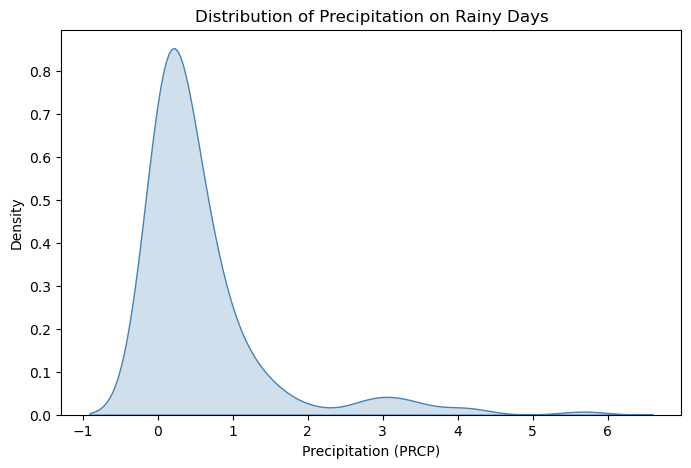

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset conditional on being rainy
rainy_days = weather[weather["rain"] == 1]

plt.figure(figsize=(8,5))
sns.kdeplot(data=rainy_days, x="PRCP", fill=True, color="steelblue", bw_adjust=1.0)

plt.title("Distribution of Precipitation on Rainy Days")
plt.xlabel("Precipitation (PRCP)")
plt.ylabel("Density")

plt.show()

    KDE shows a right-skewed distribution — light rain days dominate, heavy rain is infrequent.

    One way to improve the model is to expand from a simple two-state Markov chain into a multivariate Markov model that includes other variables (temperature, humidity, pressure) that affect rain patterns.

## 4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

with open('taxicab.pkl', 'rb') as f:
    data = pickle.load(f)

print (len(data))
data[0]

1000


0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
            ...        
29                 SoHo
29                 SoHo
13    Greenwich Village
3               Chelsea
3               Chelsea
Name: nbhd, Length: 26026, dtype: object

In [207]:
len(set(data[0]))

33

In [208]:
## Extract state space --> neighborhoods

states = set(data[0])              
for i in range(1,len(data)):          
    trip_i = set(data[i])
    states = states.union(trip_i)
states = list(states)

In [209]:
trip = data[0]

In [210]:
seq = np.array(trip)
seq

array(['Outside Manhattan', 'Outside Manhattan', 'Outside Manhattan', ...,
       'Greenwich Village', 'Chelsea', 'Chelsea'],
      shape=(26026,), dtype=object)

In [211]:
t=1

In [56]:
## Compute transition counts:

S = len(states)
tr_counts = np.zeros((S,S)) # rows: to, cols: from

for trip in data:
    seq = np.array(trip)
    for t in range(1, len(seq)):
    # Current and next tokens:
        x_tm1 = seq[t-1] # previous state
        x_t = seq[t] # current state
        # Determine transition indices:
        index_from = states.index(x_tm1)
        index_to = states.index(x_t)
        # Update transition counts:
        tr_counts[index_to, index_from] += 1

print('Transition counts:\n', tr_counts)


Transition counts:
 [[0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [0.00000e+00 3.23970e+04 7.60000e+01 ... 2.28000e+02 5.08100e+03
  1.37000e+02]
 [0.00000e+00 8.30000e+01 5.49300e+03 ... 6.35000e+02 1.08600e+03
  1.74000e+02]
 ...
 [0.00000e+00 1.61000e+02 6.90000e+02 ... 2.51120e+04 3.27000e+03
  1.04900e+03]
 [0.00000e+00 6.20700e+03 9.38000e+02 ... 3.51400e+03 3.46322e+05
  2.10500e+03]
 [0.00000e+00 1.56000e+02 2.25000e+02 ... 1.17000e+03 1.94900e+03
  1.60010e+04]]


In [216]:
x_tm1

'Outside Manhattan'

In [215]:
x_t


'Outside Manhattan'

In [220]:
# Sum the transition counts by row:

sums = tr_counts.sum(axis = 0, keepdims = True)
print('State counts:\n')  
print(sums)

State counts:

[[1.000000e+00 1.627100e+05 5.791000e+04 1.063810e+05 3.859100e+04
  8.740570e+05 1.431100e+04 5.077810e+05 1.803502e+06 2.797710e+06
  1.058700e+05 5.102590e+05 3.851989e+06 2.363902e+06 6.544000e+05
  8.886410e+05 3.705730e+05 2.171460e+05 4.930000e+02 8.010000e+03
  2.292350e+05 3.168450e+05 7.252200e+04 3.000000e+00 4.415730e+05
  5.017520e+05 1.038800e+04 1.978286e+06 3.603000e+03 3.952900e+05
  1.200000e+01 5.505930e+05 3.701250e+05 4.086350e+05 8.393600e+05
  1.743200e+05 1.224335e+06 1.112820e+05]]


                     Liberty Island  Morningside Heights  Civic Center  \
Liberty Island                  0.0                 0.00          0.00   
Morningside Heights             0.0                 0.20          0.00   
Civic Center                    0.0                 0.00          0.09   
Nolita                          0.0                 0.00          0.01   
Little Italy                    0.0                 0.00          0.01   
Theater District                0.0                 0.02          0.02   
Inwood                          0.0                 0.00          0.00   
Kips Bay                        0.0                 0.00          0.01   
Upper West Side                 0.0                 0.35          0.01   
Upper East Side                 0.0                 0.08          0.03   
Chinatown                       0.0                 0.00          0.03   
Greenwich Village               0.0                 0.00          0.02   
Midtown                         0.0   

<Axes: >

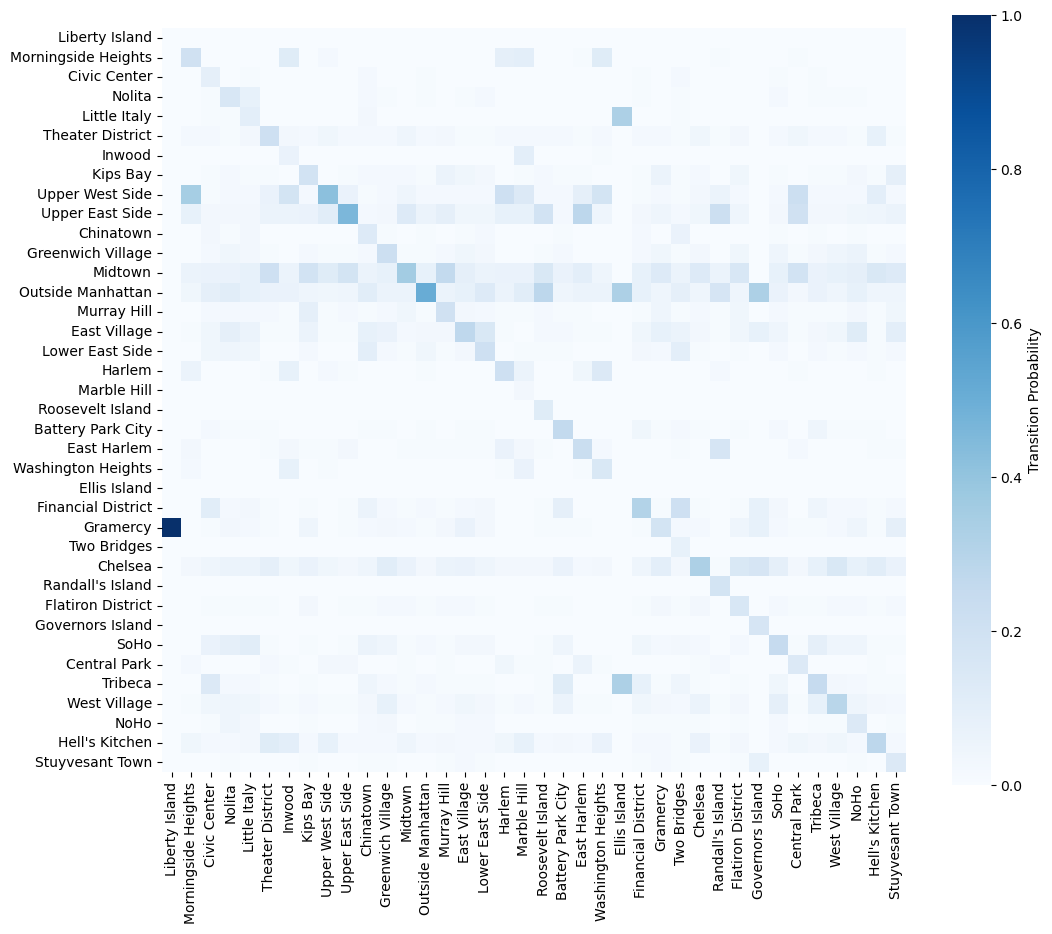

In [ ]:
# Compute the transition matrix for the taxicab data between neighborhoods in Manhattan

tr_pr = tr_counts / sums
tr_pr = np.round(tr_pr, 2)

tr_df = pd.DataFrame(tr_pr, columns=states, index=states)
print(tr_df)

plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, cmap = 'Blues', square = True, xticklabels = states, yticklabels = states, cbar_kws = {'label': 'Transition Probability'})

In [227]:
routes = []
for i_from, frm in enumerate(states):
    for i_to, to in enumerate(states):
        cnt = tr_counts[i_to, i_from]
        if cnt > 0:  # skip empty transitions
            routes.append((frm, to, int(cnt), float(tr_pr[i_to, i_from])))

# Sort by raw trip counts (most actual trips)
routes_by_count = sorted(routes, key=lambda x: x[2], reverse=True)

# Sort by conditional probability (most likely given the origin)
routes_by_prob = sorted(routes, key=lambda x: x[3], reverse=True)

for frm, to, cnt, prob in routes_by_count[:10]:
    print(f"{frm} --> {to}: {cnt:,} trips, P(to|from) = {prob:.3f}")

Midtown --> Midtown: 1,389,343 trips, P(to|from) = 0.360
Upper East Side --> Upper East Side: 1,283,151 trips, P(to|from) = 0.460
Outside Manhattan --> Outside Manhattan: 1,203,902 trips, P(to|from) = 0.510
Upper West Side --> Upper West Side: 763,963 trips, P(to|from) = 0.420
Chelsea --> Chelsea: 662,397 trips, P(to|from) = 0.330
Upper East Side --> Midtown: 507,502 trips, P(to|from) = 0.180
Midtown --> Upper East Side: 484,395 trips, P(to|from) = 0.130
Hell's Kitchen --> Hell's Kitchen: 346,322 trips, P(to|from) = 0.280
Midtown --> Chelsea: 278,191 trips, P(to|from) = 0.070
Chelsea --> Midtown: 260,420 trips, P(to|from) = 0.130


**Most common routes**

    Bright diagonal line (top-left to bottom-right) indicates that most taxis tend to stay within the same neighborhood, or at least trips that start and end in the same labeled zone are common. The few other bright off-diagonal spots indicate likely popular cross-neighborhood routes [e.g., Morningside Heights - Upper West Side; Ellis Island - Little Italy / Tribeca; etc.]

    Top 10 routes by observed trip counts:

        Midtown --> Midtown: 1,389,343 trips, P(to|from) = 0.360
        Upper East Side --> Upper East Side: 1,283,151 trips, P(to|from) = 0.460
        Outside Manhattan --> Outside Manhattan: 1,203,902 trips, P(to|from) = 0.510
        Upper West Side --> Upper West Side: 763,963 trips, P(to|from) = 0.420
        Chelsea --> Chelsea: 662,397 trips, P(to|from) = 0.330
        Upper East Side --> Midtown: 507,502 trips, P(to|from) = 0.180
        Midtown --> Upper East Side: 484,395 trips, P(to|from) = 0.130
        Hell's Kitchen --> Hell's Kitchen: 346,322 trips, P(to|from) = 0.280
        Midtown --> Chelsea: 278,191 trips, P(to|from) = 0.070
        Chelsea --> Midtown: 260,420 trips, P(to|from) = 0.130




**Taxicabs are most likely order 1** 

    (next location depends only on the current location) because once a taxi reaches a neighborhood, its next pickup or drop-off depends on current demand in that area and not on where it came from. Once the cab reaches a new neighborhood, where it came from no longer influences where it goes next.

In [228]:
# Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips

current_location = "Hell's Kitchen"
current_index = states.index(current_location)
x = np.zeros(len(states))
x[current_index] = 1.0  # one-hot encode current location

for t in range(2, 11):
    x = tr_pr @ x
    # Get top 3 most likely locations
    top_indices = np.argsort(x)[-3:][::-1]
    top_locations = [(states[i], x[i]) for i in top_indices]
    print(f"After {t} trips from {current_location}:")
    for loc, prob in top_locations:
        print(f"  {loc}: P = {prob:.3f}")    
                    

After 2 trips from Hell's Kitchen:
  Hell's Kitchen: P = 0.280
  Midtown: P = 0.150
  Chelsea: P = 0.110
After 3 trips from Hell's Kitchen:
  Midtown: P = 0.171
  Hell's Kitchen: P = 0.118
  Chelsea: P = 0.106
After 4 trips from Hell's Kitchen:
  Midtown: P = 0.169
  Upper East Side: P = 0.110
  Chelsea: P = 0.096
After 5 trips from Hell's Kitchen:
  Midtown: P = 0.165
  Upper East Side: P = 0.116
  Outside Manhattan: P = 0.095
After 6 trips from Hell's Kitchen:
  Midtown: P = 0.162
  Upper East Side: P = 0.117
  Outside Manhattan: P = 0.097
After 7 trips from Hell's Kitchen:
  Midtown: P = 0.159
  Upper East Side: P = 0.117
  Outside Manhattan: P = 0.098
After 8 trips from Hell's Kitchen:
  Midtown: P = 0.157
  Upper East Side: P = 0.115
  Outside Manhattan: P = 0.098
After 9 trips from Hell's Kitchen:
  Midtown: P = 0.155
  Upper East Side: P = 0.114
  Outside Manhattan: P = 0.097
After 10 trips from Hell's Kitchen:
  Midtown: P = 0.153
  Upper East Side: P = 0.112
  Outside Manhatta

In [251]:
# Starting at any neighborhood, iterate your forecast until it is no longer changing very much. 

start_state = "Hell's Kitchen"
x = np.zeros(len(states))
x[states.index(start_state)] = 1.0  # one-hot start

# tolerance for convergence
tol = 1e-3
max_iters = 1000

for step in range(max_iters):
    x_next = T @ x
    diff = np.linalg.norm(x_next - x, ord=1)  # L1 distance
    if diff < tol:
        print(f"Converged after {step+1} steps (change={diff:.2e})")
        break
    x = x_next

x = x / x.sum()

# Show top 10 neighborhoods in long-run equilibrium
steady_state = pd.DataFrame({
    "Neighborhood": states,
    "Long-run Probability": x
}).sort_values("Long-run Probability", ascending=False)

print(steady_state.head(10).to_string(index=False))
    

Converged after 214 steps (change=9.89e-04)
     Neighborhood  Long-run Probability
          Midtown              0.169788
  Upper East Side              0.124598
Outside Manhattan              0.107647
          Chelsea              0.089759
  Upper West Side              0.075947
   Hell's Kitchen              0.055094
 Theater District              0.039579
     East Village              0.038522
     West Village              0.038160
      Murray Hill              0.028058


In [250]:
# starting in Chelsea

start_state = "Chelsea"
x = np.zeros(len(states))
x[states.index(start_state)] = 1.0  # one-hot start

# tolerance for convergence
tol = 1e-3
max_iters = 1000

for step in range(max_iters):
    x_next = T @ x
    diff = np.linalg.norm(x_next - x, ord=1)  # L1 distance
    if diff < tol:
        print(f"Converged after {step+1} steps (change={diff:.2e})")
        break
    x = x_next

x = x / x.sum()

# Show top 10 neighborhoods in long-run equilibrium
steady_state = pd.DataFrame({
    "Neighborhood": states,
    "Long-run Probability": x
}).sort_values("Long-run Probability", ascending=False)

print(steady_state.head(10).to_string(index=False))

Converged after 212 steps (change=9.99e-04)
     Neighborhood  Long-run Probability
          Midtown              0.169788
  Upper East Side              0.124598
Outside Manhattan              0.107647
          Chelsea              0.089759
  Upper West Side              0.075947
   Hell's Kitchen              0.055094
 Theater District              0.039579
     East Village              0.038522
     West Village              0.038160
      Murray Hill              0.028058


In [249]:
# starting in Murray Hill

start_state = "Murray Hill"
x = np.zeros(len(states))
x[states.index(start_state)] = 1.0  # one-hot start

# tolerance for convergence
tol = 1e-3
max_iters = 1000

for step in range(max_iters):
    x_next = T @ x
    diff = np.linalg.norm(x_next - x, ord=1)  # L1 distance
    if diff < tol:
        print(f"Converged after {step+1} steps (change={diff:.2e})")
        break
    x = x_next

x = x / x.sum()

# Show top 10 neighborhoods in long-run equilibrium
steady_state = pd.DataFrame({
    "Neighborhood": states,
    "Long-run Probability": x
}).sort_values("Long-run Probability", ascending=False)

print(steady_state.head(10).to_string(index=False))

Converged after 216 steps (change=9.92e-04)
     Neighborhood  Long-run Probability
          Midtown              0.169788
  Upper East Side              0.124598
Outside Manhattan              0.107647
          Chelsea              0.089759
  Upper West Side              0.075947
   Hell's Kitchen              0.055094
 Theater District              0.039579
     East Village              0.038522
     West Village              0.038160
      Murray Hill              0.028058


**Where do cabs spend most of their time working in Manhattan?**

    In the long run, taxis spend the largest share of their time in Midtown (≈17%), followed by the Upper East Side (≈12%).